In [1]:
### General imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

### --- Figure config
LEGEND_SIZE = 15

In [2]:
from emukit.test_functions import forrester_function
from emukit.core.loop.user_function import UserFunctionWrapper
from emukit.core import ContinuousParameter, ParameterSpace

target_function, space = forrester_function()

# def source_function(x):
#     return target_function(x) * 0.5 


# def target_function(x):
#     return np.sin(x*np.pi*2)

# def source_function(x):
#     return np.sin(x*np.pi*2) * 0.5 

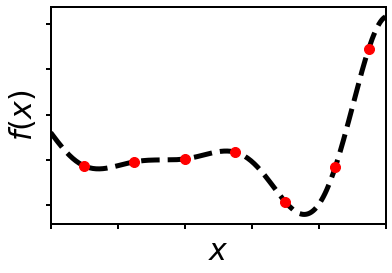

In [25]:
x_plot = np.linspace(space.parameters[0].min, space.parameters[0].max, 200)[:, None]
y_plot = target_function(x_plot)
# y_plot_s = source_function(x_plot)

fontsize = 30
plt.figure(figsize=(6, 4))

plt.plot(x_plot, y_plot, "k", label="Objective Function" ,linewidth=5,linestyle="--",)
# plt.plot(x_plot, y_plot_s, "k", label="Source Function" ,linewidth=5,linestyle="--",)
# plt.legend(loc=2, prop={'size': LEGEND_SIZE})

# legend = plt.legend(loc='best', fontsize=20,frameon=False)
# plt.setp(legend.get_texts(), fontname='Arial')

#  Random sampling
# X_init = np.array([[0.1], [0.2], [0.25], [0.3], [0.9]])

#  Uniform sampling
X_init = np.array([[0.1], [0.25], [0.4], [0.55], [0.7], [0.85], [0.95]])

#  Trasfer sampling
# X_init = np.array([[0.66], [0.7], [0.75], [0.8],[0.83],])

Y_init = target_function(X_init)
plt.plot(X_init, Y_init, "ro", markersize=10, label="Previous Observations")

for spine in plt.gca().spines.values():
    spine.set_linewidth(2)  # Set frame width to 3
    
plt.tick_params(direction='out', length=5, width=2, labelsize=20, grid_alpha=0.7)
    
    
    # 隐藏 x 和 y 轴的刻度值
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

    
plt.xlabel(r"$x$", fontsize=fontsize)
plt.ylabel(r"$f(x)$", fontsize=fontsize)
# plt.grid(True)
plt.xlim(0, 1)
plt.show()

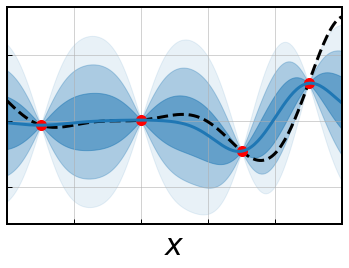

In [7]:
import GPy
from emukit.model_wrappers.gpy_model_wrappers import GPyModelWrapper

#  Random sampling
# X_init = np.array([[0.1], [0.2], [0.25], [0.3], [0.9]])

#  Uniform sampling
X_init = np.array([[0.1], [0.4],  [0.7], [0.9]])

#  Trasfer sampling
# X_init = np.array([[0.66], [0.7], [0.75], [0.8],[0.83],])

Y_init = target_function(X_init)

# ,[0.75],[0.76], [0.77], 

gpy_model = GPy.models.GPRegression(X_init, Y_init, GPy.kern.RBF(1, lengthscale=0.08, variance=20), noise_var=1e-10)
emukit_model = GPyModelWrapper(gpy_model)

mu_plot, var_plot = emukit_model.predict(x_plot)

fontsize = 30
plt.figure(figsize=(6, 4))

plt.plot(x_plot, y_plot, "k", label="Objective Function" ,linewidth=3,linestyle="--",)
plt.plot(X_init, Y_init, "ro", markersize=10, label="Previous Observations")
# plt.plot(X_init, Y_init, "ro", markersize=10, label="Next Observations")

plt.plot(x_plot, mu_plot, "C0", label="Model",linewidth=3)
plt.fill_between(x_plot[:, 0],
                 mu_plot[:, 0] + np.sqrt(var_plot)[:, 0],
                 mu_plot[:, 0] - np.sqrt(var_plot)[:, 0], color="C0", alpha=0.5)
plt.fill_between(x_plot[:, 0],
                 mu_plot[:, 0] + 2 * np.sqrt(var_plot)[:, 0],
                 mu_plot[:, 0] - 2 * np.sqrt(var_plot)[:, 0], color="C0", alpha=0.3)
plt.fill_between(x_plot[:, 0],
                 mu_plot[:, 0] + 3 * np.sqrt(var_plot)[:, 0],
                 mu_plot[:, 0] - 3 * np.sqrt(var_plot)[:, 0], color="C0", alpha=0.1)


# legend = plt.legend(loc='best', fontsize=20,frameon=False)
# plt.setp(legend.get_texts(), fontname='Arial')

for spine in plt.gca().spines.values():
    spine.set_linewidth(2)  # Set frame width to 3
    
plt.tick_params(direction='in', length=5, width=1, labelsize=20, grid_alpha=0.7)
 
    # 隐藏 x 和 y 轴的刻度值
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
    
plt.xlabel(r"$x$", fontsize=fontsize)
# plt.ylabel(r"$f(x)$", fontsize=fontsize)
plt.grid(True)
plt.xlim(0, 1)
plt.show()




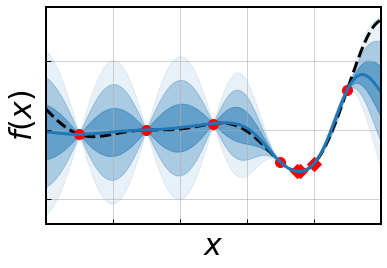

In [20]:
import GPy
from emukit.model_wrappers.gpy_model_wrappers import GPyModelWrapper

# X_init = np.array([[0.1], [0.2], [0.25], [0.3], [0.9],[0.5],[0.6], [0.7]])

X_init = np.array([[0.1], [0.3], [0.5], [0.7], [0.9],[0.75],[0.76], [0.8]])
# X_init = np.array([[0.1], [0.4],  [0.7], [0.9],[0.76],])

# X_init = np.array([[0.66], [0.7], [0.75], [0.8],[0.83],[0.76],[0.74],[0.77]])

Y_init = target_function(X_init)

# ,[0.75],[0.76], [0.77], 

gpy_model = GPy.models.GPRegression(X_init, Y_init, GPy.kern.RBF(1, lengthscale=0.08, variance=20), noise_var=1e-10)
emukit_model = GPyModelWrapper(gpy_model)

mu_plot, var_plot = emukit_model.predict(x_plot)

fontsize = 30
plt.figure(figsize=(6, 4))

num_ini = 3

plt.plot(x_plot, y_plot, "k", label="Objective Function" ,linewidth=3,linestyle="--",)
plt.plot(X_init[:-num_ini], Y_init[:-num_ini], "ro", markersize=10, label="Previous Observations")
plt.plot(X_init[-num_ini:], Y_init[-num_ini:], marker='D', linestyle='None', color='r', markersize=10, label="Next Observations")
# plt.plot(X_init[-num_ini:], Y_init[-num_ini:], marker='*', linestyle='None', color='r', markersize=20, label="Next Observations")


plt.plot(x_plot, mu_plot, "C0", label="Model",linewidth=3)
plt.fill_between(x_plot[:, 0],
                 mu_plot[:, 0] + np.sqrt(var_plot)[:, 0],
                 mu_plot[:, 0] - np.sqrt(var_plot)[:, 0], color="C0", alpha=0.5)
plt.fill_between(x_plot[:, 0],
                 mu_plot[:, 0] + 2 * np.sqrt(var_plot)[:, 0],
                 mu_plot[:, 0] - 2 * np.sqrt(var_plot)[:, 0], color="C0", alpha=0.3)
plt.fill_between(x_plot[:, 0],
                 mu_plot[:, 0] + 3 * np.sqrt(var_plot)[:, 0],
                 mu_plot[:, 0] - 3 * np.sqrt(var_plot)[:, 0], color="C0", alpha=0.1)


# legend = plt.legend(loc='best', fontsize=20,frameon=False)
# plt.setp(legend.get_texts(), fontname='Arial')

for spine in plt.gca().spines.values():
    spine.set_linewidth(2)  # Set frame width to 3
    
plt.tick_params(direction='in', length=5, width=1, labelsize=20, grid_alpha=0.7)
    
  
    # 隐藏 x 和 y 轴的刻度值
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

plt.xlabel(r"$x$", fontsize=fontsize)
plt.ylabel(r"$f(x)$", fontsize=fontsize)
plt.grid(True)
plt.xlim(0, 1)
plt.show()


